In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [79]:
from sklearn.model_selection import train_test_split

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [54]:
data = pd.read_csv('/Users/glebmutovin/Data_Science/DataScience_Netology/Machine_learning/Theme_10_Feature_selection/Архив_3/Kobe.csv')

In [55]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge (с встроеной регуляризацией) на тех же признаках - построить сравнительную таблицу или график коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. 

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shot_made_flag', ylabel='count'>

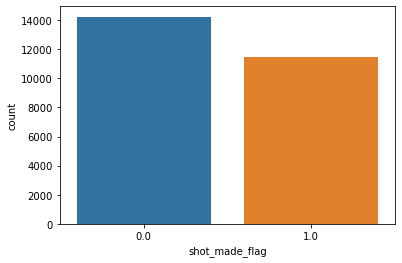

In [6]:
sns.countplot(data.shot_made_flag)

Проведем анализ категориальных признаков

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


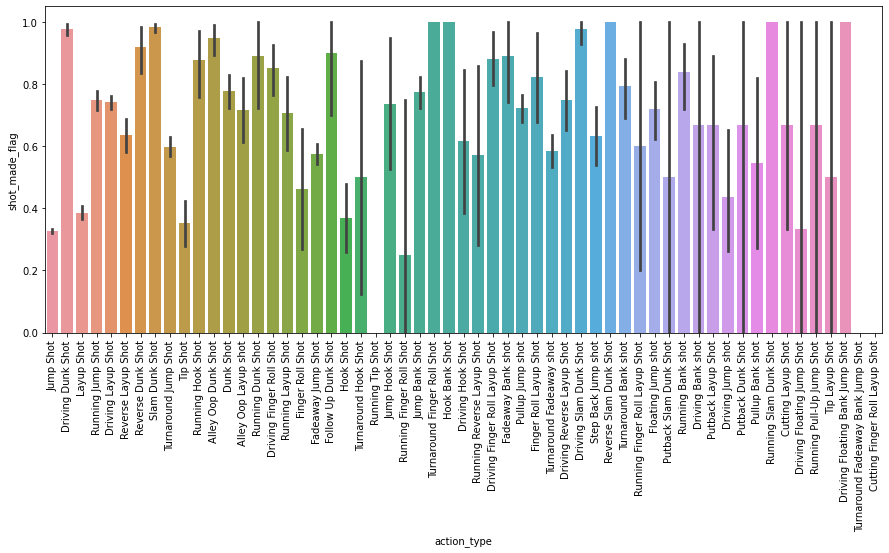

In [8]:
plt.figure(figsize=(15,6))
sns.barplot('action_type', 'shot_made_flag', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Различные типы бросков приводят к разной частоте попаданий, поэтому можно использовать этот признак

In [9]:
data['combined_shot_type'].value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='combined_shot_type', ylabel='shot_made_flag'>

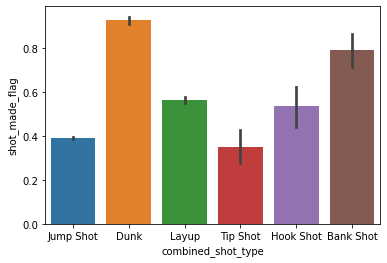

In [10]:
sns.barplot(data.combined_shot_type, data.shot_made_flag)

In [ ]:
# Этот признак можно использовать для анализа

Сезон, в котором был совершен бросок

In [11]:
data['season'].value_counts()

2005-06    2318
2008-09    2242
2002-03    2241
2007-08    2153
2009-10    2080
2001-02    2028
2006-07    1887
2000-01    1868
2010-11    1825
2003-04    1638
2011-12    1637
2012-13    1593
1999-00    1577
2004-05    1324
2015-16    1113
1997-98     989
1998-99     921
2014-15     713
1996-97     477
2013-14      73
Name: season, dtype: int64

In [12]:
# Можно попробовать оставить только год начала сезона и перевести в integer

In [56]:
data['season'] = data['season'].apply(lambda x: x[:4])
data['season'] = pd.to_numeric(data['season'])

Признак - игра в плей-офф или регулярный чемпионат

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='playoffs', ylabel='count'>

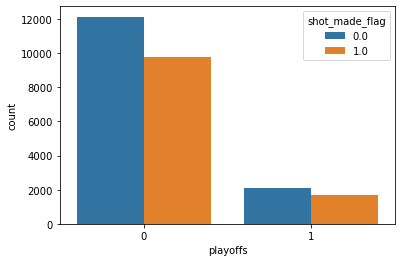

In [14]:
sns.countplot('playoffs', hue ='shot_made_flag', data=data)

In [ ]:
# Исходя из визуализации признак playoffs фактически никак не влияет на результат броска

Тип броска

In [15]:
data['shot_type'].value_counts()

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64

In [ ]:
# Можно создать новый признак, который будет принимать значение 1 при 3-х очковом броске и 0 при 2-х очковом

In [57]:
data['3rd_point_shot'] = data['shot_type'].str.contains('3PT', regex=False).astype('int')

Зоны броска

In [17]:
data['shot_zone_area'].value_counts()

Center(C)                13455
Right Side Center(RC)     4776
Right Side(R)             4588
Left Side Center(LC)      4044
Left Side(L)              3751
Back Court(BC)              83
Name: shot_zone_area, dtype: int64

In [18]:
data['shot_zone_basic'].value_counts()

Mid-Range                12625
Restricted Area           7136
Above the Break 3         5620
In The Paint (Non-RA)     4578
Right Corner 3             387
Left Corner 3              280
Backcourt                   71
Name: shot_zone_basic, dtype: int64

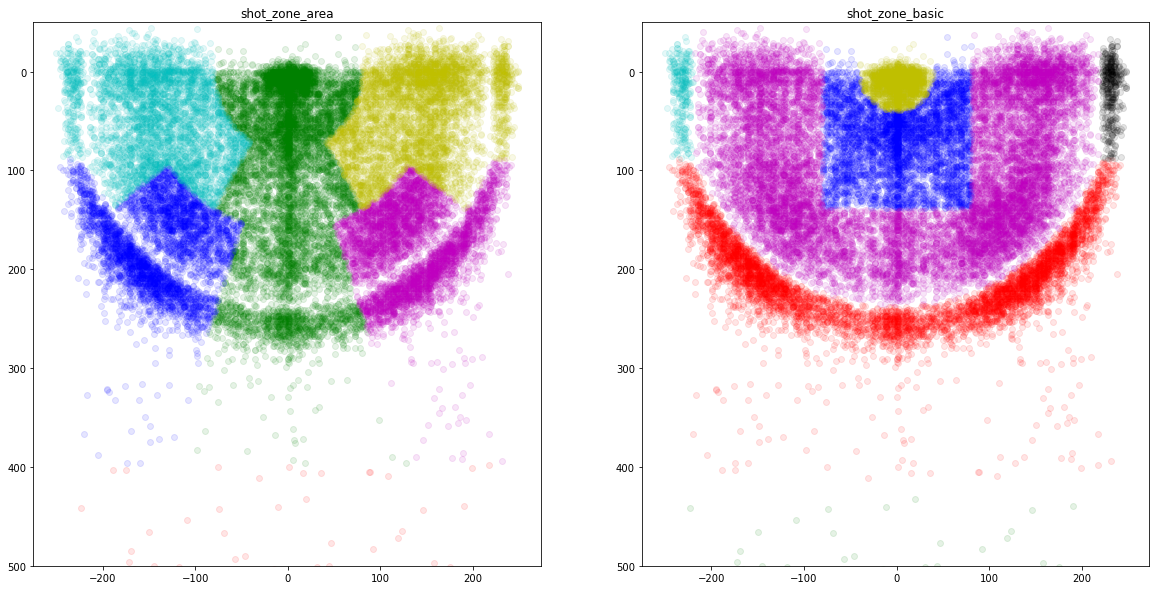

In [19]:
area_group = data.groupby('shot_zone_area')
basic_group = data.groupby('shot_zone_basic')

plt.subplots(1, 2, figsize=(20, 10), sharey=True)
colors = list('rgbcmyk')

plt.subplot(121)
plt.ylim(500, -50)
plt.title('shot_zone_area')
for i, (_, area) in enumerate(area_group):
    plt.scatter(area['loc_x'], area['loc_y'], alpha=0.1, color=colors[i])

plt.subplot(122)
plt.ylim(500, -50)
plt.title('shot_zone_basic')
for i, (_, basic) in enumerate(basic_group):
    plt.scatter(basic['loc_x'], basic['loc_y'], alpha=0.1, color=colors[i])

Зона броска

In [20]:
data['shot_zone_range'].value_counts()

Less Than 8 ft.    9398
16-24 ft.          8315
8-16 ft.           6626
24+ ft.            6275
Back Court Shot      83
Name: shot_zone_range, dtype: int64

In [ ]:
# Признак фактически группирует различные дистанции броска в 5 групп, а значит не несет дополнительной информации

Команда, в которой играл Коби

In [21]:
data['team_name'].value_counts()

Los Angeles Lakers    30697
Name: team_name, dtype: int64

In [22]:
data['team_id'].value_counts()

1610612747    30697
Name: team_id, dtype: int64

In [23]:
# Только одно значение принимает признак - можно его убрать из датасета

Дата указана как строка - можно перевести в объект timestamp (секунды)

In [24]:
data['game_date'].value_counts()

2016-04-13    50
2002-11-07    47
2006-01-22    46
2006-12-29    45
2008-01-14    44
              ..
1997-04-25     1
1997-02-21     1
1996-11-29     1
1997-02-28     1
1996-12-29     1
Name: game_date, Length: 1559, dtype: int64

In [25]:
from datetime import datetime

In [26]:
def data_trans(row):
    return datetime.fromisoformat(row).timestamp()

In [58]:
data['game_date_timestamp'] = data['game_date'].apply(data_trans)

Игра - дома/в гостях

In [28]:
data['matchup'].value_counts()

LAL @ SAS      1020
LAL vs. SAS     936
LAL @ SAC       889
LAL vs. HOU     878
LAL @ DEN       873
               ... 
LAL @ PHO        33
LAL vs. NOP      27
LAL vs. SAN      22
LAL @ UTH        21
LAL vs. BKN      15
Name: matchup, Length: 74, dtype: int64

In [ ]:
# Можно создать новый признак, который будет содержать информацию о том, была ли игра домашней или гостевой
# Поскольку соперники указаны в другом признаке (opponent), то признак matchup можно убрать

In [59]:
data['home_game'] = data['matchup'].str.contains('vs.').astype(int)

Соперники Коби

In [30]:
data['opponent'].value_counts()

SAS    1978
PHX    1781
HOU    1666
SAC    1643
DEN    1642
POR    1539
UTA    1490
MIN    1474
GSW    1356
LAC    1285
DAL    1199
MEM    1030
BOS     946
SEA     828
IND     761
PHI     720
ORL     719
DET     715
OKC     677
TOR     664
NYK     657
MIA     627
CHA     620
CLE     619
CHI     610
WAS     600
MIL     586
NOH     581
NJN     520
ATL     519
NOP     344
VAN     246
BKN      55
Name: opponent, dtype: int64

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


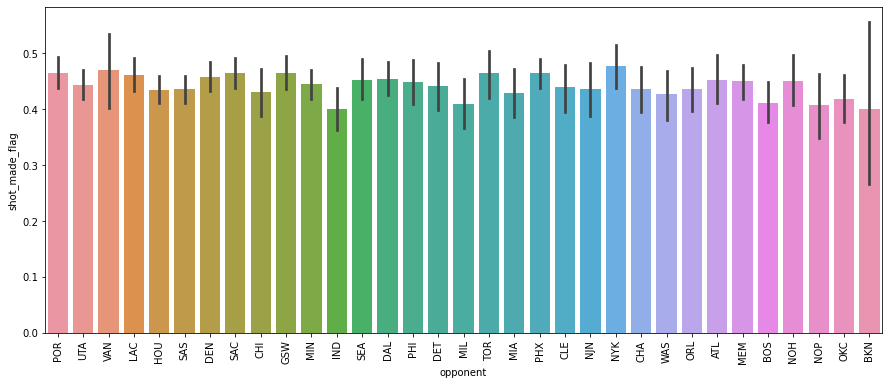

In [31]:
plt.figure(figsize=(15,6))
sns.barplot('opponent', 'shot_made_flag', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Видно, что у Коби не было "любимых" команд - всем соперникам он забивал примерно одинаково, 
# поэтому признак можно убрать из анализа

Признаки game_event_id и game_id можно убрать, так как соответствующая информация может быть получена из других признаков

Проверим насколько признаки 'loc_x', 'loc_y', 'lat' и 'lon' коррелируют друг с другом

<AxesSubplot:>

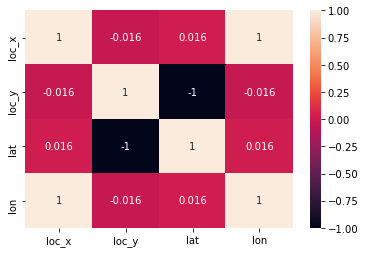

In [32]:
selected_features = data[['loc_x', 'loc_y', 'lat', 'lon']]
sns.heatmap(selected_features.corr(), annot = True)

Признаки lot и lon сильно коррелируют с признаками loc_x и loc_y соответственно. Можно их убрать

Признаки loc_x и loc_y характеризуют дистанцию броска (пример анализа признака взят отсюда: https://www.kaggle.com/narimiran/absolute-beginner/notebook)

In [60]:
dist = pd.DataFrame({'true_dist': np.sqrt((data['loc_x']/10)**2 + (data['loc_y']/10)**2), 
                     'shot_dist': data['shot_distance']})
dist[:10]

,true_dist,shot_dist
0,18.185984,18
1,15.700000,15
2,16.860012,16
3,22.286543,22
4,0.000000,0
5,14.541664,14
6,0.000000,0
7,2.801785,2
8,12.605158,12
9,12.928264,12


In [34]:
# Признак shot_dist является примерной дистанцией броска, посчитанной по расположению Коби на площадке в осях x и y
# Можно заменить этот признак на более точную дистанцию

In [61]:
data['shot_distance'] = dist['true_dist']

Посмотрим на признаки, которые характеризуют оставшееся до конца периода время

In [36]:
data['seconds_remaining'].value_counts()

0     985
1     659
2     598
32    557
4     557
28    550
5     549
36    546
41    541
25    536
40    527
11    526
38    526
44    526
13    526
37    523
23    521
3     520
33    519
24    518
27    512
8     511
16    510
18    509
45    508
57    507
14    507
47    507
34    506
31    504
19    504
10    503
43    501
42    501
35    499
7     498
22    498
20    496
39    494
21    494
17    492
26    491
29    486
30    486
15    483
12    478
6     474
50    473
9     469
52    468
56    464
59    462
46    461
48    460
51    457
49    454
58    447
54    445
53    437
55    431
Name: seconds_remaining, dtype: int64

In [37]:
data['minutes_remaining'].value_counts()

0     3866
4     2855
3     2839
2     2834
1     2734
5     2651
6     2383
7     2215
9     2202
8     2139
10    2122
11    1857
Name: minutes_remaining, dtype: int64

Можно попробовать объединить минуты и секунды в один признак - оставшееся время (time_remaining)

In [62]:
data['time_remaining'] = 60 * data.loc[:, 'minutes_remaining'] + data.loc[:, 'seconds_remaining']

Выведем признак shot_id в качестве индекса броска

In [63]:
data.set_index('shot_id', inplace=True)

In [64]:
data.shape

(30697, 28)

Убираем ненужные признаки

In [65]:
data = data.drop(['minutes_remaining', 'seconds_remaining', 'lat', 'lon', 'shot_type',
           'game_event_id', 'game_id', 'shot_zone_range', 'game_date', 'matchup',
           'team_name', 'team_id', 'playoffs'], 1)

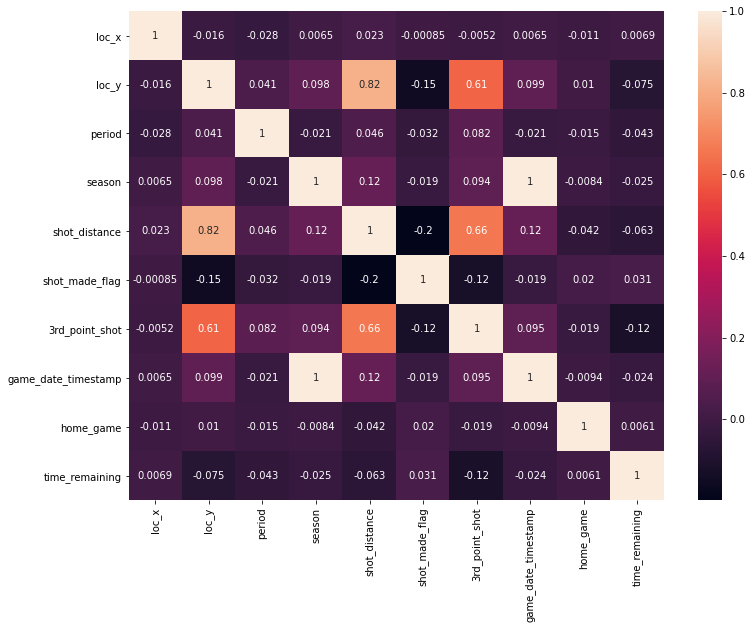

In [66]:
corr = data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.show()

Проверка на выбросы

In [67]:
data_1 = data.drop('shot_made_flag', 1)
col_names = data_1.select_dtypes(include=np.number).columns.tolist()

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


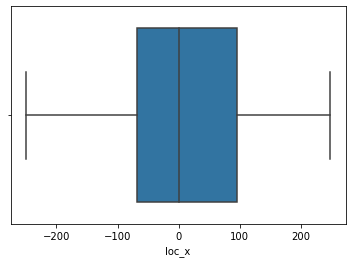

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


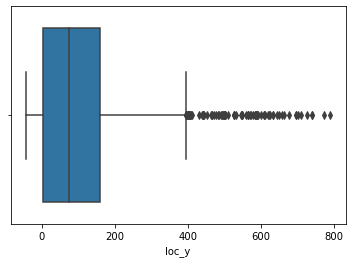

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


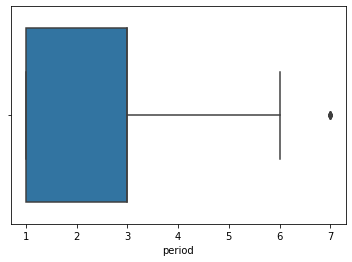

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


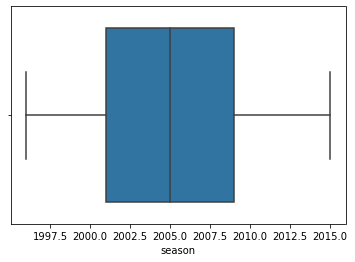

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


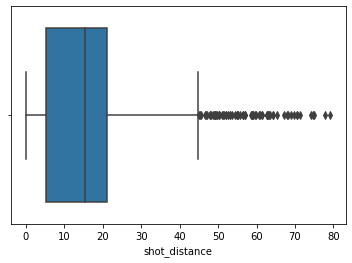

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


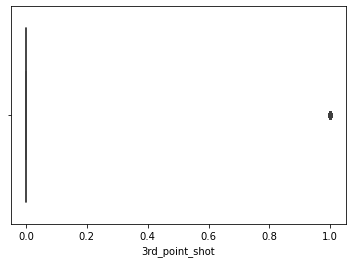

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


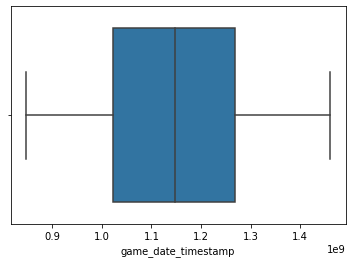

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


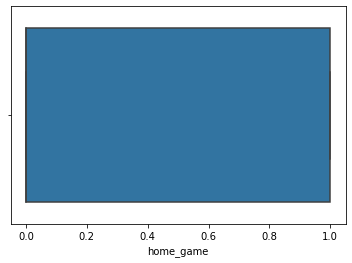

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


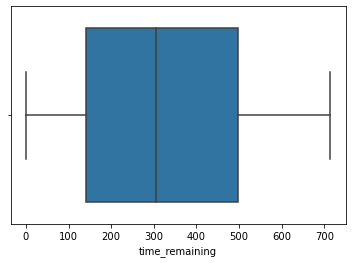

In [68]:
for i in col_names:
    sns.boxplot(data[i])
    plt.show()

Визуальный анализ боксплотов не выявил выбросов - все выходящие за рамки боксплота значения могут иметь место в действительности



Обработаем оставшиеся категориальные признаки с помощью onehotencoder

In [69]:
data = pd.get_dummies(data, columns=['shot_zone_area', 'shot_zone_basic', 'opponent', 'action_type', 'combined_shot_type'], 
                   prefix=['Zone area is', 'Zone basic is', 'Opponent is', 'Action type is', 'Combined type is'])

In [70]:
data.shape

(30697, 119)

Можно проверить важность признаков с помощью ETC 

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

In [71]:
col_names1 = ['loc_x', 'loc_y', 'period', 'season', 'shot_distance', 
              '3rd_point_shot', 'game_date_timestamp', 'home_game']

In [72]:
xy = data.dropna()
X = xy.drop('shot_made_flag', 1) 
Y = xy['shot_made_flag']
# извлечение признаков
model = ExtraTreesClassifier()
model.fit(X, Y) # обучение
for i in range(len(col_names1)):
    print(f"{col_names1[i]}\t- {model.feature_importances_[i]:.4f}")

loc_x	- 0.0816
loc_y	- 0.0826
period	- 0.0658
season	- 0.0778
shot_distance	- 0.0861
3rd_point_shot	- 0.0033
game_date_timestamp	- 0.0961
home_game	- 0.0258


In [ ]:
# Наиболее важными признаками модель считает game_date_timestamp, shot_distance, loc_x, loc_y, season и period

Модель Lasso

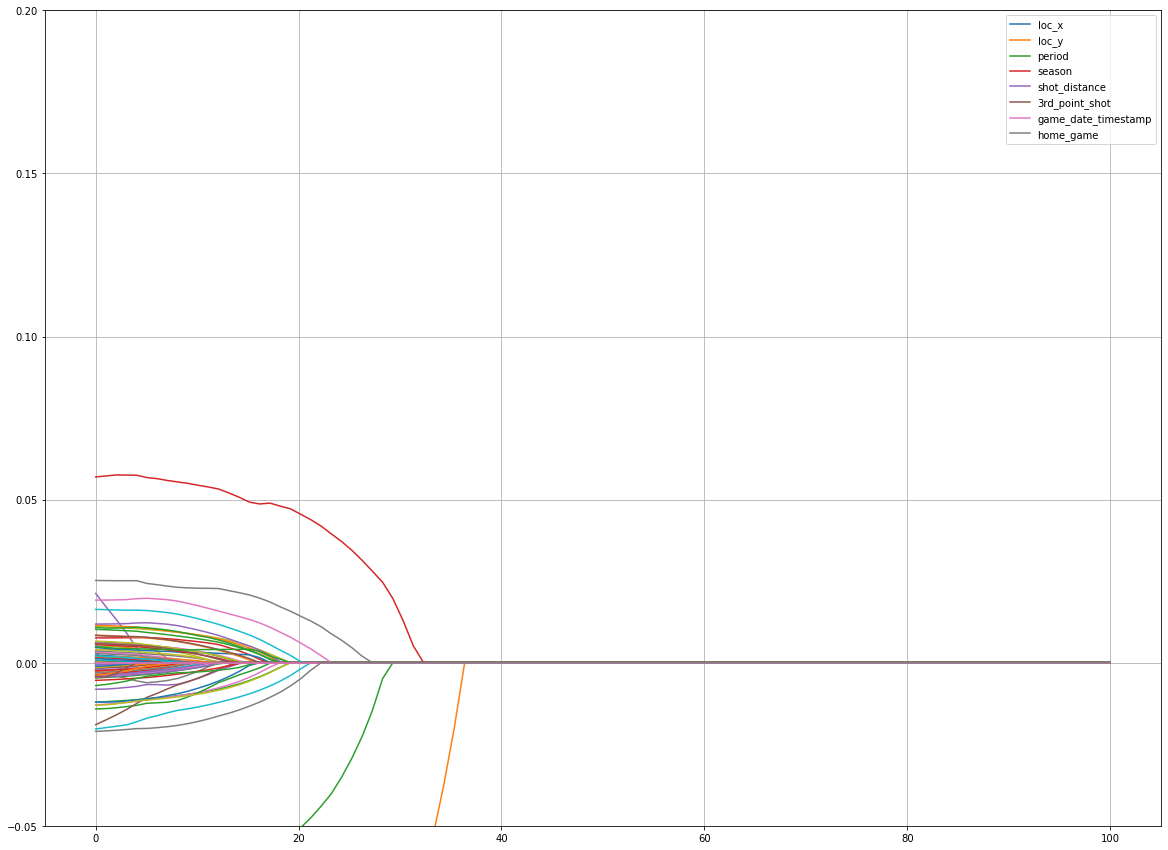

In [73]:
from sklearn.linear_model import  Lasso 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_sc = StandardScaler().fit_transform(X) # преобразование данных
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, Y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(20,15))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)  
plt.legend(col_names1)      
plt.grid()

Последними зануляются признаки loc_y, season, period, home_game - модель посчитала эти признаки наиболее важными

In [80]:
from sklearn.preprocessing import StandardScaler

X_sc = StandardScaler().fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_sc, Y, test_size=0.3, random_state=42)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.linear_model import RidgeClassifier

In [90]:
ridge =  RidgeClassifier()
ridge.fit(X_train_scaled, y_train)
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)
print(ridge.coef_)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

[[-2.40219641e-02  7.80815382e-03 -2.83985460e-02  6.28680995e-02
   9.56742063e-02  6.17550064e-02 -8.47601537e-02  1.00296223e-02
   2.51046993e-02 -4.53312500e-02  4.07137561e-03 -8.02113125e-03
  -2.84845634e-02  3.04861601e-02  3.83209052e-03 -1.00126168e-01
  -1.57272415e-02  2.57242231e-02 -1.02584144e-03  2.11527854e-02
   5.07214436e-02 -1.20002685e-02 -4.93081388e-03 -7.60584121e-03
  -3.23275634e-03  2.54586801e-03  3.71530233e-03 -8.09142570e-03
   4.67747335e-03  3.33061323e-03  4.96656663e-03 -1.00348741e-02
  -7.59465385e-03 -1.32359855e-02  1.61007257e-03 -7.17667194e-03
  -5.77465886e-03  6.24980998e-04 -4.47964820e-03 -6.93257583e-03
  -4.33978262e-07  1.55809023e-03  1.63321141e-02 -1.40842326e-02
  -1.10549851e-03  7.09652702e-03  2.31698610e-02 -1.87994600e-03
   1.06912818e-02 -4.94040467e-03  8.17465426e-03 -7.41429235e-03
   1.18277904e-03  5.91125986e-03  1.87718048e-05  2.90817959e-02
   1.73595723e-02  0.00000000e+00  2.47373945e-04 -3.51216111e-03
   5.03397

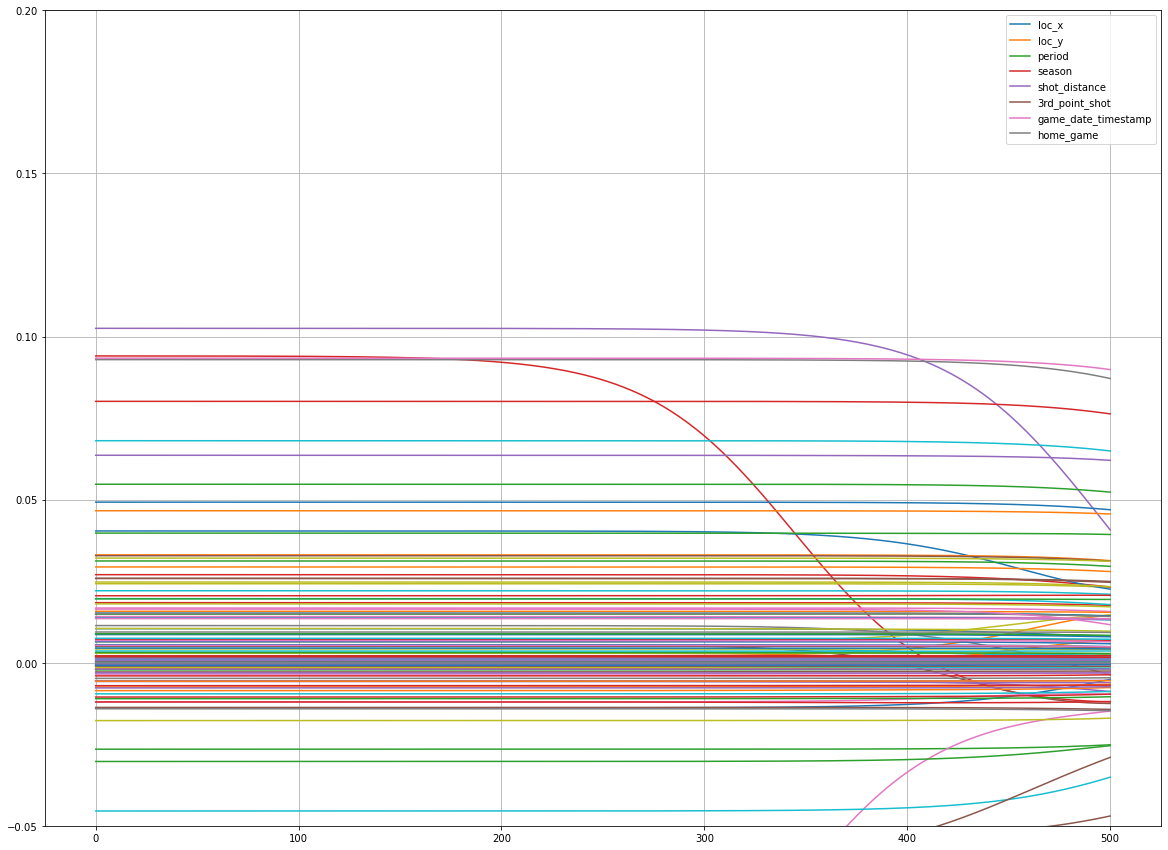

In [91]:
lg_r,pred_r = [], []

list_r=list(2**np.linspace(-10,10,500))

for i in range(len(list_r)):
    m_l = RidgeClassifier(alpha=list_r[i]).fit(X_sc, Y)
    lg_r.append(m_l)
    pred_r.append(m_l.coef_)

plt.figure(figsize=(20,15))
x_r = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_r,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)  
plt.legend(col_names1)      
plt.grid()